# Gradient boost demo 

## GBM regressor

In [2]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
 
# Setting SEED for reproducibility
SEED = 23
 
# Importing the dataset
X, y = load_diabetes(return_X_y=True)
 
# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = SEED)
 
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='ls',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1,
                                random_state = SEED,
                                max_features = 5)
 
# Fit to training set
gbr.fit(train_X, train_y)
 
# Predict on test set
pred_y = gbr.predict(test_X)
 
# test set RMSE
test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)
 
# Print rmse
print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 55.59


/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


In [3]:
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [4]:
print(y)


[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

## GBM regressor with grid search

In [5]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Setting SEED for reproducibility
SEED = 25

# Importing the dataset
#X, y = load_diabetes(return_X_y=True)

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=SEED)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 2, 3],
    'max_features': [5, 10]
}

# Instantiate Gradient Boosting Regressor
gs_gbr = GradientBoostingRegressor(loss='ls', random_state=SEED)

# Create GridSearchCV object
grid_search = GridSearchCV(gs_gbr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to training set
grid_search.fit(train_X, train_y)

# Get the best model
best_gbr = grid_search.best_estimator_

# Predict on test set
pred_y = best_gbr.predict(test_X)

# Test set RMSE
test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

# Print best parameters and RMSE
print('Best Hyperparameters:', grid_search.best_params_)
print('Root mean Square error: {:.2f}'.format(test_rmse))

/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The lo

/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The lo

/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The lo

/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The lo

/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The lo

/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The lo

/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The lo

/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/iiitb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The lo

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 2, 'max_features': 5, 'n_estimators': 300}
Root mean Square error: 55.66


## sklearn.dataset to Pandas dataframe

In [8]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Importing the dataset as a NumPy array
X, y = load_diabetes(return_X_y=True)

# Convert X and y to Pandas DataFrame
X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
y_df = pd.Series(y, name='target')

# Combine X and y DataFrames
df = pd.concat([X_df, y_df], axis=1)

## visualizing the dataframe

In [9]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Features to attribute mapping

1. age age in years
2. sex
3. bmi body mass index
4. bp average blood pressure
5. s1 tc, total serum cholesterol
6. s2 ldl, low-density lipoproteins
7. hdl, high-density lipoproteins
8. s4 tch, total cholesterol / HDL
9. s5 ltg, possibly log of serum triglycerides level
10.s6 glu, blood sugar level

The target variable (Column 11) is a quantitative measure of disease progression one year after baseline </font>



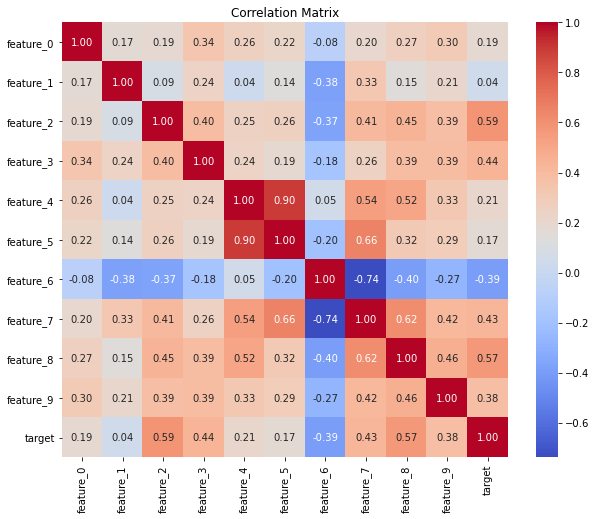

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already created the 'df' DataFrame as mentioned earlier

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

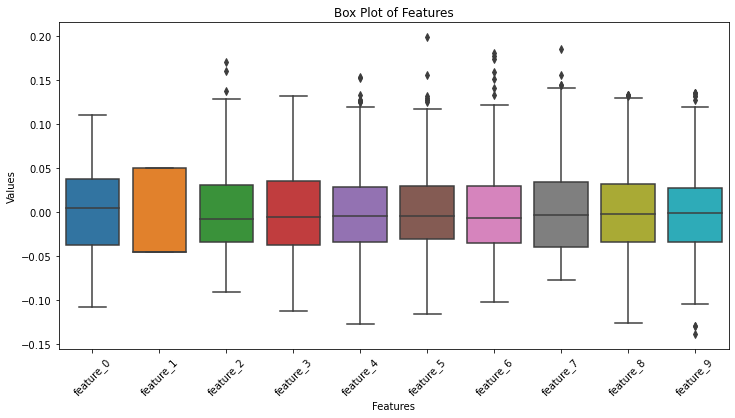

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created the 'df' DataFrame as mentioned earlier

# Create a box plot of the features
plt.figure(figsize=(12, 6))  # Set the figure size

# Specify the columns you want to include in the box plot (all columns in this case)
columns_to_plot = df.columns[:-1]  # Exclude the target column

# Create the box plot
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

## GBM classifier

In [13]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
 
# Setting SEED for reproducibility
SEED = 26

In [14]:

# Classification of hand written digits
# Importing the dataset
Xc, yc = load_digits(return_X_y=True)
 

In [15]:
# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(Xc, yc,
                                                    test_size = 0.25,
                                                    random_state = SEED)

In [16]:
# Instantiate Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )

In [17]:
# Fit to training set
gbc.fit(train_X, train_y)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=300,
                           random_state=100)

In [18]:
# Predict on test set
pred_y = gbc.predict(test_X)

In [19]:
# accuracy
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.96


## Visualizing the digits 

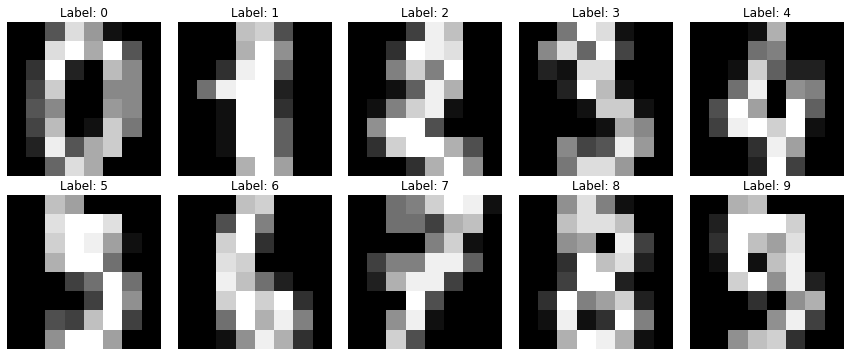

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Import the dataset
Xc, yc = load_digits(return_X_y=True)

# Define the number of rows and columns for the subplot grid
n_rows = 2
n_cols = 5  # You can change this to display a different number of digits per row

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5))

# Iterate through the grid and display digits
for i in range(n_rows):
    for j in range(n_cols):
        index = i * n_cols + j
        digit_data = Xc[index].reshape(8, 8)  # Reshape the flat data to 8x8 image format
        axes[i, j].imshow(digit_data, cmap='gray')
        axes[i, j].set_title(f"Label: {yc[index]}")
        axes[i, j].axis('off')  # Turn off axis labels

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()